## DATA MANIPULATION AND VISUALITATION:

En este notebook se procederá a la manipulación de datos a partir del csv creado previamente en el arhivo de Data cleaning. Se procederá a agrupar y crear otros dataframes cuando sea necesario para permitir una óptima visualización de los resultados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px

In [2]:
df = pd.read_csv("shark-file.csv")

In [4]:
#Vamos a ordenar los datos por años, y borrar la columna de fecha, pues no la vamos a utilizar
df.sort_values("Year", inplace= True)
df.drop(columns= "Date", inplace= True)

In [5]:
#Sustituimos los datos desconocidos por NAN para la visualización de nuestros gráficos, y cambiamos la columna de años a tipo entero
df.replace("Unknown", np.nan, inplace=True)
df['Year'] = df['Year'].astype("float64").astype("Int64")

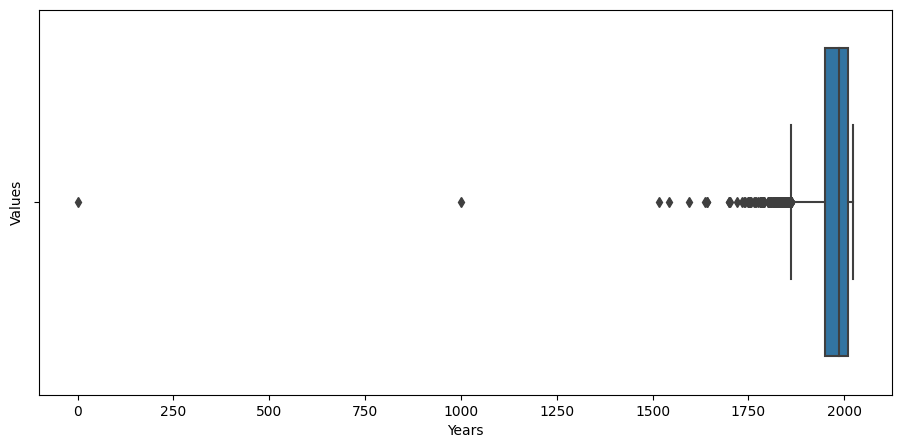

In [6]:
#Hacemos un boxplot de los ataques por año

plt.figure(figsize=(11, 5))
sns.boxplot(x=df["Year"])
plt.xlabel("Years")
plt.ylabel("Values")
plt.show()

In [7]:
#Vemos que tenemos muchos outlayers, que en algunas ocasiones son datos erróneos (año 0) y en otras ocasiones significan que en ciertos años hay muy pocos
#añores registrados. Debido a la gran cantidad de datos de la que disponemos, vamos a centrar nuestro estudio a partir de los años 1850, y hasta 2022. 

In [8]:
df = df.drop(df[df['Year'] < 1850].index)
df = df.drop(df[df['Year'] > 2022 ].index)
df.reset_index(drop= True, inplace= True)

### GRÁFICA PARA VISUALIZAR EL NÚMERO DE ATAQUES POR AÑO

In [9]:
#Agrupamos el dataframe por los años y obtenemos las frecuencias de ataque

years = df.groupby(["Year"])[["Year"]].count()
years.rename(columns={"Year": "Freq"}, inplace= True)

In [10]:
#Visualizamos los datos
fig =px.line(x=years.index, y=years["Freq"], title= "Shark attacks by year (1850 -2022)", color_discrete_sequence=['red'], width=1000, height=600)
fig.update_xaxes(title_text="Years", title_font=dict(size=18), title_standoff=25)
fig.update_yaxes(title_text="Frequence", title_font=dict(size=18), title_standoff=25)
fig.update_layout(title={'x':0.5,
                         'xanchor': 'center',
                         'font': {'size': 25, 'family': 'Arial'}})

fig.show()

In [69]:
#Los ataques de tiburón han ido en aumento a lo largo de los años, con dos picos en el año 1960 y 2015

In [68]:
years.median()  #La mediana de ataques de tiburón es de 25.5 ataques al año

Freq    25.5
dtype: float64

### GRÁFICA PARA VISUALIZAR EL DAÑO DE LOS ATAQUES A LO LARGO DE LOS AÑOS

In [11]:
#Vamos a agrupar el dataframe por años, y por el daño (ataques mortales o no mortales)
year_damage = df.groupby(["Year", "Damage"]).size().unstack()

In [55]:
trace1 = go.Scatter(x=year_damage.index, y= year_damage["Fatal"], mode='lines', name='Fatal', line=dict(color='red', width=2))
trace2 = go.Scatter(x=year_damage.index, y= year_damage["No Fatal"], mode='lines', name='No Fatal', line=dict(color='green', width=2))

title={'text': 'Damage by year', 'x':0.5,'xanchor': 'center','font': {'size': 25, 'family': 'Arial'}}
xaxis= {'title': 'Years'}
yaxis= {'title': 'Frequence'}


layout = go.Layout(title= title, xaxis=xaxis, yaxis=yaxis, width=1000, height=600)

fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.show()

In [70]:
#Se ve que los ataques mortales se han mantenido, y solo se han visto en aumento los ataques no mortales

### GRÁFICA PARA VISUALIZAR EL SEXO DE LAS VÍCTIMAS ATACADAS A LO LARGO DE LOS AÑOS

In [13]:
sex_years = df.groupby(["Year", "Sex"]).size().unstack()
sex_years


trace1 = go.Scatter(x=sex_years.index, y= sex_years["F"], mode='markers', name='F', line=dict(color='ForestGreen', width=2))
trace2 = go.Scatter(x=sex_years.index, y= sex_years["M"], mode='markers', name='M', line=dict(color='purple', width=2))

title={'text': 'Sex by year', 'x':0.5,'xanchor': 'center','font': {'size': 25, 'family': 'Arial'}}
xaxis= {'title': 'Years'}
yaxis= {'title': 'Frequence'}


layout = go.Layout(title= title, xaxis=xaxis, yaxis=yaxis, width=1000, height=600)

fig = go.Figure(data=[trace1, trace2], layout=layout)



fig.show()


In [ ]:
#Los ataques se han producido principalmente a hombres, y no es hasta el año 2000 cuando aumentan tambien las víctimas mujeres

### BOX-POT DE SEXO Y EDAD

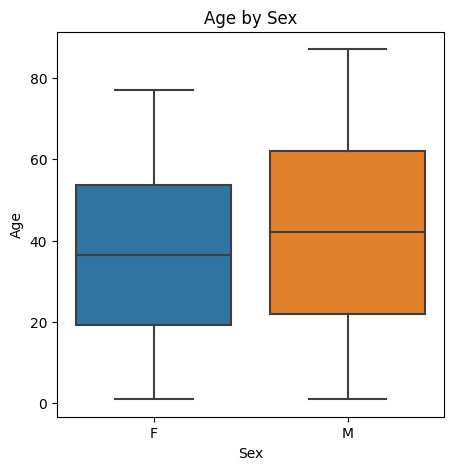

In [57]:
sex_age = df.groupby(["Age", "Sex"]).size().reset_index(name= "count")

sex_age["Age"] = sex_age["Age"].astype("float").astype("Int64")

plt.figure(figsize=(5,5))
sns.boxplot(x='Sex', y='Age', data=sex_age)
plt.title("Age by Sex")
plt.show()

In [ ]:
#La edad mediana de las víctimas es realmente similar entre hombres y mujeres, y se encuentra en torno a los 40 años. 

### GRÁFICA PARA VISUALIZAR EL TIPO DE ATAQUE

In [15]:
type = df.groupby(["Type"]).size().reset_index(name= "count")

fig = px.pie(type, 
             values="count", 
             names="Type", 
             title= "Type of attack", 
             width=900, 
             height=630,
             color_discrete_sequence= [px.colors.qualitative.Prism[1], px.colors.qualitative.T10[8]]
             )

fig.update_traces(pull=[0.1, 0, 0])

title = {'x':0.5,'font': {'size': 26, 'family': 'Arial'}}

legend= {
        "title_font_family" :"Times New Roman",
        "font" : {"size": 16},
        "bordercolor" : "Black",
        "borderwidth": 1}

fig.update_layout(title = title, legend = legend)

fig.show()


In [71]:
#El mayor porcentaje de ataques producidos consisten en ataques no provocados por el ser humano, es decir, que suceden en el hábitat natural

### GRÁFICA PARA VISUALIZAR LAS ESPECIES QUE ESTÁN INVOLUCRADAS EN DICHOS ATAQUES

In [16]:
Sharks = df.groupby("Species")[["Species"]].count()
Sharks.rename(columns={"Species":"Freq"}, inplace= True)
Sharks = Sharks.sort_values(by="Freq", ascending= False)
most_Sharks = Sharks[:13]
most_Sharks

,Freq
Species,
White Shark,726
Bull Shark,218
Blacktip Shark,130
Nurse Shark,111
Tiger Shark,88
Whaler Shark,83
Reef Shark,59
Mako Shark,57
Wobbegong Shark,55


In [17]:
fig = px.bar(most_Sharks, 
             y=most_Sharks.Freq, 
             x=most_Sharks.index, 
             title="Shark species most involved in attacks",
             color= most_Sharks.index,
             width= 800,
             height=600
             )

title = {'x':0.5,'xanchor': 'center','font': {'size': 25, 'family': 'Arial'}}

fig.update_layout(showlegend=False, title = title)

fig.show()

In [ ]:
#El tiburón blanco es la especie que más involucrada se encuentra en dichos ataques

### GRÁFICA PARA VISUALIZAR LOS PAÍSES DONDE SE HAN REGISTRADO UN MAYOR NÚMERO DE ATAQUES

In [18]:
Country= df.groupby("Country", as_index=True)[["Country",]].count()
Country.rename(columns={"Country" :"Frequence"}, inplace= True)
Country = Country.sort_values(by=["Frequence"], ascending= False)
Country.reset_index(inplace= True)
Country[0:20]

,Country,Frequence
0,USA,2452
1,AUSTRALIA,1415
2,SOUTH AFRICA,594
3,NEW ZEALAND,140
4,PAPUA NEW GUINEA,133
5,BAHAMAS,127
6,BRAZIL,117
7,MEXICO,94
8,ITALY,68
9,FIJI,63


In [19]:

fig = px.pie(Country[:10], 
             values="Frequence", 
             names="Country", 
             title= "Countries with the highest recorded attacks", 
             width=900, 
             height=630)

title = {'x':0.5,'font': {'size': 26, 'family': 'Arial'}}
legend= {
        "title_font_family" :"Times New Roman",
        "font" : {"size": 14},
        "bordercolor" : "Black",
        "borderwidth": 1}

fig.update_layout(title = title, legend = legend)

fig.show()

In [21]:
Countrys_more = df[(df["Country"] == "USA") | (df["Country"] == "AUSTRALIA") | (df["Country"] == "SOUTH AFRICA")]
Countrys_more = Countrys_more.groupby(["Country", "Area"]).size().reset_index(name= "count")


In [58]:
fig = px.sunburst(Countrys_more, 
                  path=['Country', 'Area'], 
                  values='count',
                  width= 800,
                  height= 800,
                  color_discrete_sequence= px.colors.qualitative.Dark24_r,
                  title= "Countries and areas with the highest recorded attacks"
                  )
fig.show()

In [ ]:
#Los países con más registros de ataques son USA (destacando el estado de Florida) AUSTRALIA y SUDÁFRICA

### GRÁFICA PARA VISUALIZAR LOS MESES DONDE SE PRODUCEN MÁS ATAQUES POR PAÍSES

In [23]:
countrys_more_relevants = df[(df["Country"] == "USA") | (df["Country"] == "AUSTRALIA") | (df["Country"] == "SOUTH AFRICA")]
countrys_more_relevants

,Year,Month,Type,Country,Area,Location,Activity,Activity on surface,Table Presence,Sex,Age,Injury,Damage,Time,Species
1,1850,October,Unprovoked,USA,Hawaii,NaN,Swimming,Yes,No,M,NaN,FATAL,Fatal,NaN,NaN
2,1851,March,Unprovoked,USA,Hawaii,Honolulu Harbor,Swimming,Yes,No,M,NaN,FATAL,Fatal,NaN,NaN
3,1851,January,Unprovoked,USA,California,"San Francisco Bay (or San Leandro Bay), near c...",Diving,No,No,M,NaN,3 toes severed,No Fatal,NaN,18' Shark
6,1852,January,Unprovoked,USA,North & South Carolina,"Mount Pleasant, Charleston County","Vessel capsized, wading ashore carrying an oar",NaN,NaN,M,NaN,"FATAL, body was not recovered",Fatal,NaN,NaN
8,1852,December,NaN,AUSTRALIA,New South Wales,"Clark's Island, Sydney Harbor",Swimming,Yes,No,M,NaN,Shark involvement prior to death was not confi...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513,<NA>,NaN,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Diving,No,No,M,19,"Ankle punctured & lacerated, hands abraded PRO...",No Fatal,NaN,Nurse Shark
6515,<NA>,NaN,Unprovoked,USA,California,"Capistrano, Orange County",NaN,NaN,NaN,F,NaN,Leg injured,No Fatal,NaN,White Shark
6527,<NA>,NaN,Unprovoked,USA,North & South Carolina,Somewhere between Hatteras and Beaufort,Swimming,Yes,No,M,NaN,Lost leg,No Fatal,NaN,NaN
6528,<NA>,NaN,Unprovoked,SOUTH AFRICA,Kwazulu-Natal,Durban,Wading,NaN,No,M,NaN,"FATAL, leg stripped of flesh",Fatal,NaN,NaN


In [24]:
months_countrys = countrys_more_relevants.groupby(["Month", "Country"]).size().unstack()
months_countrys

Country,AUSTRALIA,SOUTH AFRICA,USA
Month,,,
April,115,51,175
August,56,25,362
December,189,70,76
February,158,57,65
January,250,129,124
July,58,39,403
June,69,29,263
March,128,53,113
May,63,38,169


In [25]:
trace1 = go.Bar( x= months_countrys.index, y=months_countrys["USA"], name= "USA" )
trace2 = go.Bar( x= months_countrys.index, y=months_countrys["AUSTRALIA"], name= "Australia" )
trace3 = go.Bar( x= months_countrys.index, y=months_countrys["SOUTH AFRICA"], name= "South Africa")

months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]


title={"text": "Attacks per month in the most represented countries", 
       "x":0.5,
       "xanchor": "center",
       "font": {"size": 25, "family": "Arial"}
       }

xaxis= {"title": "Months",
        "categoryorder":"array",
        "categoryarray": months_order}
yaxis= {"title": "Frequence"}


layout = go.Layout(title= title, xaxis=xaxis, yaxis=yaxis, width=900, height=600)

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

fig.show()

In [ ]:
#Vemos la diferencia entre hemisferios norte y sur en esta gráfica: el verano en el hemisferio sur se corresponde con los meses de diciembre, 
#enero y febrero : en verano es donde más ataques de tiburón se registran 

### VISUALIZACIÓN DE ESPECIES MÁS IMPLICADAS POR ESTOS PAÍSES

In [26]:
#Nos basamos en el df que hemos creado con los países más relevantes, y para que nos represente del mismo modo solo las especies más relevantes, 
#hacemos una máscara booleana paara que solo aparezcan como índices las especies de nuestro dataframe (most_sharks) 

sharks_countrys = countrys_more_relevants.groupby(["Species", "Country"])[["Country", "Species"]].size().unstack()
sharks_countrys = sharks_countrys[sharks_countrys.index.isin(most_Sharks.index)]
sharks_countrys


Country,AUSTRALIA,SOUTH AFRICA,USA
Species,,,
Blacktip Shark,4.0,10.0,94.0
Blue Shark,11.0,3.0,15.0
Bull Shark,44.0,3.0,86.0
Hammerhead Shark,7.0,3.0,33.0
Lemon Shark,3.0,NaN,21.0
Mako Shark,8.0,8.0,18.0
Nurse Shark,45.0,NaN,48.0
Raggedtooth Shark,1.0,42.0,NaN
Reef Shark,13.0,NaN,11.0


In [59]:
fig = px.bar(sharks_countrys, 
             y=sharks_countrys.index, 
             x=sharks_countrys.columns, 
             title="Sharks attacks by Specie and Country", 
             #color_discrete_sequence=px.colors.qualitative.Bold
             color_discrete_sequence= px.colors.qualitative.Prism,
             width= 900,
             height= 600,
)
fig.show()

### LAS ACTIVIDADES QUE SE ESTABAN REALIZANDO DURANTE LOS ATAQUES

In [28]:
activity = df.groupby(["Activity"])[["Activity"]].count()
activity.rename(columns= {"Activity": "Freq"}, inplace= True)
activity.sort_values(by= "Freq", ascending= False, inplace= True)
activity = activity[:19]
activity

,Freq
Activity,
Surfing,1331
Swimming,1141
Fishing,559
Diving,534
Spearfishing,468
Wading,357
Watercraft,340
Body boarding,241
Bathing,173


In [29]:
fig = px.bar(activity, 
             y=activity.Freq, 
             x=activity.index, 
             title="Activities that were taking place",
             color= activity.index,
             width= 800,
             height=600
             )

title = {'x':0.5,'xanchor': 'center','font': {'size': 25, 'family': 'Arial'}}

fig.update_layout(showlegend=False, title = title)

fig.show()

### PARA COMPROBAR LA HIPÓTESIS : GRÁFICAS DE VISUALIZACIÓN DONDE SE VE SI SE PRODUCEN UN MAYOR NÚMERO DE ATAQUES EN LA SUPERFICIE

In [31]:
counts = df.groupby(["Damage", "Activity on surface", "Table Presence"]).size().reset_index(name="Count")
counts


,Damage,Activity on surface,Table Presence,Count
0,Fatal,No,No,178
1,Fatal,Yes,No,547
2,Fatal,Yes,Yes,125
3,No Fatal,No,No,726
4,No Fatal,Yes,No,843
5,No Fatal,Yes,Yes,1380


In [32]:
counts["Activity on surface"] = counts["Activity on surface"].str.replace("No", "No surface").replace("Yes", "Surface")
counts["Table Presence"] = counts["Table Presence"].str.replace("No", "No table").replace("Yes", "Table")

In [33]:
fig = px.pie(counts, 
             values="Count", 
             names="Activity on surface", 
             title= "Did the attack take place on the surface?", 
             width=900, 
             height=630,
             color_discrete_sequence= [px.colors.qualitative.Prism[1], px.colors.qualitative.T10[8]]
             )

fig.update_traces(pull=[0.1, 0, 0])

title = {'x':0.5,'font': {'size': 26, 'family': 'Arial'}}

legend= {
        "title_font_family" :"Times New Roman",
        "font" : {"size": 16},
        "bordercolor" : "Black",
        "borderwidth": 1}

fig.update_layout(title = title, legend = legend)

fig.show()

In [34]:
fig = px.bar(counts, 
             x= "Count", 
             y= "Activity on surface", 
             color="Table Presence", 
             text = "Damage",
             orientation= "h",
             width= 1100,
             height= 500,
             color_discrete_sequence= px.colors.qualitative.Dark24_r,
             )
fig.show()

In [ ]:
#Prácticamente el 75% de los ataques son producidos en la superficie, sin embargo, el hecho de que la víctima se encuentre 
#realizando una actividad como el surf, no parece ser muy determinante. De hecho, si realizamos este mismo análisis en los distintos países 
#que hemos mencionado previamente encontramos lo siguiente: 

In [35]:
surfacecountrys = countrys_more_relevants.groupby(["Table Presence", "Country"])[["Country", "Species"]].size().reset_index(name= "Count")
surfacecountrys

,Table Presence,Country,Count
0,No,AUSTRALIA,652
1,No,SOUTH AFRICA,247
2,No,USA,935
3,Yes,AUSTRALIA,316
4,Yes,SOUTH AFRICA,161
5,Yes,USA,887


In [36]:
fig = px.bar(surfacecountrys, 
             x= "Country", 
             y= "Count", 
             color="Table Presence",
             width= 600,
             height= 500,
             color_discrete_sequence= px.colors.qualitative.Dark24_r,
             )
fig.show()

In [ ]:
#No solo no es determinante, si no que en Australia, país donde es bien conocida la gran actividad surfista, 
#es bastante superior el número de accidentes que ocurren donde no está involucrada la presencia de una tabla de surf. 

### GRÁFICA PARA VISUALIZAR EN QUE MOMENTO DEL DÍA HAY UN MAYOR REGISTRO DE ATAQUES

In [40]:
df[["Time"]].value_counts()

Time                                                                 
Afternoon                                                                1643
Morning                                                                  1293
Evening                                                                   140
Night                                                                     119
Dusk                                                                       17
A.M.                                                                       12
P.M.                                                                       12
Midday                                                                     11
--                                                                          5
After Dusk                                                                  2
After Noon                                                                  2
Am                                                                      

In [52]:
time = df.groupby(["Time"])[["Time"]].count()
time.rename(columns={"Time": "Freq"}, inplace= True)
time = time.sort_values(by="Freq", ascending= False)
time = time[:4]
time = time.reindex(["Morning", "Afternoon", "Evening", "Night"])

In [54]:
fig =px.line(x=time.index, y=time["Freq"], title= "Shark attacks by time", color_discrete_sequence=['red'], width=1000, height=600)

fig.update_xaxes(title_text="Time", title_font=dict(size=18), title_standoff=25, )
fig.update_yaxes(title_text="Frequence", title_font=dict(size=18), title_standoff=25)
fig.update_layout(title={'x':0.5,
                         'xanchor': 'center',
                         'font': {'size': 25, 'family': 'Arial'}})

fig.show()